<a href="https://colab.research.google.com/github/SAGAR-NAYAK2000/NLP/blob/main/NLP_ASSIGNMENT2_SAGAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name : **SAGAR NAYAK**

---

UCSE19008

---
BTECH Final YEAR [2019-23]

---
Professor : **Dr. Sourav Mondal**

---
XIM UNIVERSITY

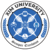


#**TASK - 1** 

Design and develop a `Sentiment Analysis application’ to analyse the sentiments on Hotel reviews using
any suitable NLP library. You can either use machine learning or deep learning approach. Use the Kaggle

website to get appropriate dataset such as https://www.kaggle.com/datafiniti/hotel-reviews?select=Datafiniti_Hotel_Reviews.csv.

Step 1: import the required libraries for the task

In [65]:
import numpy as np
import pandas as pd

Step 2 : Connecting {Mounting} with the **drive**

In [66]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Step 3: Store the dataset into data frame.

In [67]:
df1 = pd.read_csv('/content/gdrive/MyDrive/NLP/N1.csv')

In [68]:
!pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# CLEANING DATA

In [69]:
df1.head()

,address,categories,city,country,latitude,longitude,name,postalCode,province,reviews.date,reviews.dateAdded,reviews.doRecommend,reviews.id,reviews.rating,reviews.text,reviews.title,reviews.userCity,reviews.username,reviews.userProvince
0,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-09-22T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,4.0,Pleasant 10 min walk along the sea front to th...,Good location away from the crouds,NaN,Russ (kent),NaN
1,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-04-03T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Really lovely hotel. Stayed on the very top fl...,Great hotel with Jacuzzi bath!,NaN,A Traveler,NaN
2,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2014-05-13T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Ett mycket bra hotell. Det som drog ner betyge...,Lugnt l��ge,NaN,Maud,NaN
3,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-10-27T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,We stayed here for four nights in October. The...,Good location on the Lido.,NaN,Julie,NaN
4,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-03-05T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,We stayed here for four nights in October. The...,������ ���������������,NaN,sungchul,NaN


In [70]:
# We are trying to see how the ratings are distribute.

df1["reviews.rating"].value_counts()

5.0     12671
4.0      9755
3.0      5708
1.0      3068
2.0      2979
0.0       337
10.0      101
9.6        53
9.2        49
4.3        26
4.8        25
8.3        25
8.8        24
7.5        24
7.9        24
4.2        22
3.4        17
6.3        14
4.1        14
4.5        13
7.1        13
6.7        12
5.4         9
4.6         7
3.1         7
3.3         6
4.7         6
4.4         6
4.9         6
5.8         6
2.4         4
3.8         3
2.5         3
3.9         2
3.2         2
3.7         2
7.0         1
6.0         1
2.9         1
2.8         1
1.5         1
1.3         1
9.5         1
Name: reviews.rating, dtype: int64

Step 4 : Make 2 Separate data frame for my case i have taken dataframe negative{df1_neg} and dataframe positive{df1_five} respectively.

In [71]:
df1_neg = df1.loc[df1["reviews.rating"] < 4.0]
df1_neg = df1_neg.reset_index(drop = True)

In [72]:
# I have taken the 5 star ratings as positive reviews because its got the highest value in the dataset.
df1_five = df1.loc[df1["reviews.rating"] == 5.0]
df1_five = df1_five.reset_index(drop = True)

In [73]:
print(len(df1_neg))

12142


In [74]:
print(len(df1_five))

12671


Step 5 : Concat all of these dataframes into one dataframe {df1_all}

In [75]:
df1_all = pd.concat([df1_neg,df1_five],axis =0)
df1_all = df1_all.reset_index(drop = True)

In [76]:
df1_all.head()

,address,categories,city,country,latitude,longitude,name,postalCode,province,reviews.date,reviews.dateAdded,reviews.doRecommend,reviews.id,reviews.rating,reviews.text,reviews.title,reviews.userCity,reviews.username,reviews.userProvince
0,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-09-14T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,3.0,Gnstiger Ausgangspunkt fr Venedig Besuche. Ruh...,G��nstige Lage,NaN,Doppeldecker,NaN
1,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-08-02T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,3.0,It was ok hotel is nice from in and out but ro...,It was ok hotel is nice from in and out but room,NaN,ahsas,NaN
2,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2014-05-23T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,1.0,"Hotellihuone oli ullakolla, jossa ei pystynyt ...",Hotellihuone oli pettymys,NaN,A Traveler,NaN
3,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-07-02T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,1.0,DON'T stay here unless you're less than 2 feet...,"Dungeons, Drain Flies and Centipedes",NaN,A Traveler,NaN
4,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-10-10T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,3.0,Room was tiny-bed saggy-bAthroom door didn't w...,Good for one night,NaN,A Traveler,NaN


In [77]:
df1_all.tail()

,address,categories,city,country,latitude,longitude,name,postalCode,province,reviews.date,reviews.dateAdded,reviews.doRecommend,reviews.id,reviews.rating,reviews.text,reviews.title,reviews.userCity,reviews.username,reviews.userProvince
24808,1088 Powdermill Rd,"Cabins,Resorts & Vacation Cottages,Wedding Cha...",Gatlinburg,US,35.754868,-83.457295,Elk Springs Resort,37738,TN,2016-07-06T00:00:00Z,2016-06-23T16:50:58Z,NaN,NaN,5.0,We truly enjoyed staying at the Elk Springs re...,We Loved It!,Charlotte,randolphtiffany,NC
24809,1088 Powdermill Rd,"Cabins,Resorts & Vacation Cottages,Wedding Cha...",Gatlinburg,US,35.754868,-83.457295,Elk Springs Resort,37738,TN,2016-05-02T00:00:00Z,2016-06-23T16:50:58Z,NaN,NaN,5.0,We were here for a 2nd time the last weekend o...,Amazing time (both times!!),Charlotte,Sabrina P,NC
24810,1088 Powdermill Rd,"Cabins,Resorts & Vacation Cottages,Wedding Cha...",Gatlinburg,US,35.754868,-83.457295,Elk Springs Resort,37738,TN,2012-03-20T00:00:00Z,2016-06-23T16:50:58Z,NaN,NaN,5.0,Best of the Best!!!! My family and I stayed in...,Amazing time (both times!!),Charlotte,Chelsa K.,NC
24811,1088 Powdermill Rd,"Cabins,Resorts & Vacation Cottages,Wedding Cha...",Gatlinburg,US,35.754868,-83.457295,Elk Springs Resort,37738,TN,2012-03-12T00:00:00Z,2016-06-23T16:50:58Z,NaN,NaN,5.0,Amazing Vacation in Beautiful Cabin We stayed ...,Amazing time (both times!!),Charlotte,Heather D.,NC
24812,1088 Powdermill Rd,"Cabins,Resorts & Vacation Cottages,Wedding Cha...",Gatlinburg,US,35.754868,-83.457295,Elk Springs Resort,37738,TN,2015-11-03T00:00:00Z,2016-06-23T16:50:58Z,NaN,NaN,5.0,My husband and I stayed at Tree Tops which is ...,Amazing time (both times!!),Charlotte,Carol W.,NC


In [78]:
len(df1_all)

24813

# CREATE SENTIMENTS COLUMN

In [79]:
df1_all["sentiment"] = np.where(df1_all["reviews.rating"] == 5, "Positive", "Negative")

In [80]:
df1_all.head()

,address,categories,city,country,latitude,longitude,name,postalCode,province,reviews.date,reviews.dateAdded,reviews.doRecommend,reviews.id,reviews.rating,reviews.text,reviews.title,reviews.userCity,reviews.username,reviews.userProvince,sentiment
0,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-09-14T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,3.0,Gnstiger Ausgangspunkt fr Venedig Besuche. Ruh...,G��nstige Lage,NaN,Doppeldecker,NaN,Negative
1,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-08-02T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,3.0,It was ok hotel is nice from in and out but ro...,It was ok hotel is nice from in and out but room,NaN,ahsas,NaN,Negative
2,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2014-05-23T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,1.0,"Hotellihuone oli ullakolla, jossa ei pystynyt ...",Hotellihuone oli pettymys,NaN,A Traveler,NaN,Negative
3,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-07-02T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,1.0,DON'T stay here unless you're less than 2 feet...,"Dungeons, Drain Flies and Centipedes",NaN,A Traveler,NaN,Negative
4,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-10-10T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,3.0,Room was tiny-bed saggy-bAthroom door didn't w...,Good for one night,NaN,A Traveler,NaN,Negative


In [81]:
df1_all.tail()

,address,categories,city,country,latitude,longitude,name,postalCode,province,reviews.date,reviews.dateAdded,reviews.doRecommend,reviews.id,reviews.rating,reviews.text,reviews.title,reviews.userCity,reviews.username,reviews.userProvince,sentiment
24808,1088 Powdermill Rd,"Cabins,Resorts & Vacation Cottages,Wedding Cha...",Gatlinburg,US,35.754868,-83.457295,Elk Springs Resort,37738,TN,2016-07-06T00:00:00Z,2016-06-23T16:50:58Z,NaN,NaN,5.0,We truly enjoyed staying at the Elk Springs re...,We Loved It!,Charlotte,randolphtiffany,NC,Positive
24809,1088 Powdermill Rd,"Cabins,Resorts & Vacation Cottages,Wedding Cha...",Gatlinburg,US,35.754868,-83.457295,Elk Springs Resort,37738,TN,2016-05-02T00:00:00Z,2016-06-23T16:50:58Z,NaN,NaN,5.0,We were here for a 2nd time the last weekend o...,Amazing time (both times!!),Charlotte,Sabrina P,NC,Positive
24810,1088 Powdermill Rd,"Cabins,Resorts & Vacation Cottages,Wedding Cha...",Gatlinburg,US,35.754868,-83.457295,Elk Springs Resort,37738,TN,2012-03-20T00:00:00Z,2016-06-23T16:50:58Z,NaN,NaN,5.0,Best of the Best!!!! My family and I stayed in...,Amazing time (both times!!),Charlotte,Chelsa K.,NC,Positive
24811,1088 Powdermill Rd,"Cabins,Resorts & Vacation Cottages,Wedding Cha...",Gatlinburg,US,35.754868,-83.457295,Elk Springs Resort,37738,TN,2012-03-12T00:00:00Z,2016-06-23T16:50:58Z,NaN,NaN,5.0,Amazing Vacation in Beautiful Cabin We stayed ...,Amazing time (both times!!),Charlotte,Heather D.,NC,Positive
24812,1088 Powdermill Rd,"Cabins,Resorts & Vacation Cottages,Wedding Cha...",Gatlinburg,US,35.754868,-83.457295,Elk Springs Resort,37738,TN,2015-11-03T00:00:00Z,2016-06-23T16:50:58Z,NaN,NaN,5.0,My husband and I stayed at Tree Tops which is ...,Amazing time (both times!!),Charlotte,Carol W.,NC,Positive


In [82]:
df1_all =  df1_all.sample(frac = 1)
df1_all = df1_all.reset_index(drop = True)

In [83]:
df1_all.head(10)

,address,categories,city,country,latitude,longitude,name,postalCode,province,reviews.date,reviews.dateAdded,reviews.doRecommend,reviews.id,reviews.rating,reviews.text,reviews.title,reviews.userCity,reviews.username,reviews.userProvince,sentiment
0,210 Ludlow St,Hotels,Warren,US,41.836310,-79.169310,Days Inn Warren,16365,PA,2012-10-25T00:00:00Z,2017-04-20T01:37:39Z,NaN,NaN,5.0,Very conscientious and pleasant personnel and ...,Good Stay,NaN,Bob,Pennsylvania,Positive
1,545 Humboldt Ave,"Wedding Receptions & Parties,Convention & Meet...",Willows,US,39.526682,-122.212249,Holiday Inn Express & Suites Willows,95988,CA,2013-11-01T03:30:18Z,2015-09-28T00:33:18Z,NaN,NaN,5.0,"This is the second time I've stayed here, and ...",NaN,NaN,Bradley W. at Judy's Book,NaN,Positive
2,Piazza Antinori 1,Hotels,Humeston,US,43.772349,11.251337,Hotel De La Ville,50123,IA,2016-05-21T00:00:00Z,2016-11-05T19:38:30Z,NaN,NaN,5.0,"Excellent stay. Room was big, staff was friend...","All so close, but so far",NaN,Xela,NaN,Positive
3,45400 Park Ave,Hotels,Utica,US,42.628861,-83.010776,Hyatt Place Utica,48315,MI,2015-09-27T00:00:00Z,2016-11-09T19:08:09Z,NaN,NaN,5.0,Staff went above and beyond to make sure we we...,A great getaway,NaN,Jeffery,NaN,Positive
4,1700 Skibo Rd,Hotels,Fayetteville,US,35.076170,-78.960960,Hampton Inn Fayetteville Fort Bragg,28303,Ponderosa,2015-06-10T00:00:00Z,2016-08-03T22:17:51Z,NaN,NaN,5.0,We arrived on a Wednesday. Amber was VERY plea...,Fayetteville Finest Hotel,Pasadena,A Traveler,CA,Positive
5,1700 Skibo Rd,Hotels,Fayetteville,US,35.076170,-78.960960,Hampton Inn Fayetteville Fort Bragg,28303,Ponderosa,2016-06-16T00:00:00Z,2016-08-03T22:17:51Z,NaN,NaN,3.0,Sam Room 303 - the staff were responsive and f...,"Good staff, ok facilities",Vicenza,Bruiser1111,CA,Negative
6,4507 Brooklyn Ave N E,"Hotel,fun hotels in seattle",Seattle,US,47.661430,-122.314290,Hotel Deca - A Noble House Hotel,98105,WA,2015-05-19T05:00:00Z,2015-07-09T09:59:09Z,NaN,NaN,3.0,we chose this hotel for the location in the un...,basic hotel in a city of plenty,Tempe,ColleenMaitland,AZ,Negative
7,3550 Gateway St,Hotels,Springfield,US,44.085880,-123.042280,Quality Inn and Suites Eugene-springfield,97477,Spfld,2016-04-05T00:00:00Z,2016-11-01T22:46:12Z,NaN,NaN,5.0,It was close to the hospital that my brother w...,Comfortable and clean,NaN,Shannon,NaN,Positive
8,210 Ludlow St,Hotels,Warren,US,41.836310,-79.169310,Days Inn Warren,16365,PA,2013-08-05T00:00:00Z,2017-04-20T01:37:39Z,NaN,NaN,3.0,"Room was fine, but on a partial smoking floor ...",Showing its age,NaN,Lucy Fan,Michigan,Negative
9,480 King St,"Hotels,Hotel",Alexandria,US,38.804740,-77.044550,"The Alexandrian, Autograph Collection",22314,VA,2015-05-30T00:00:00Z,2017-04-20T01:34:00Z,NaN,NaN,5.0,It was great! Could use another mirror of some...,Old Townes charm,NaN,Patricia,Nc,Positive


# SPLIT INTO TRAIN AND TEST EXAMPLE

Step 6: Import the necesary module for training the model

In [84]:
import sys

In [85]:
import joblib

sys.modules['sklearn.externals.joblib'] = joblib

In [86]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df1_all["reviews.text"], df1_all["sentiment"])

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_auc_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [88]:
from sklearn.preprocessing import StandardScaler

In [89]:
df1.keys()

Index(['address', 'categories', 'city', 'country', 'latitude', 'longitude',
       'name', 'postalCode', 'province', 'reviews.date', 'reviews.dateAdded',
       'reviews.doRecommend', 'reviews.id', 'reviews.rating', 'reviews.text',
       'reviews.title', 'reviews.userCity', 'reviews.username',
       'reviews.userProvince'],
      dtype='object')

Step 7:Checking the column names.

In [90]:
df1_all.columns

Index(['address', 'categories', 'city', 'country', 'latitude', 'longitude',
       'name', 'postalCode', 'province', 'reviews.date', 'reviews.dateAdded',
       'reviews.doRecommend', 'reviews.id', 'reviews.rating', 'reviews.text',
       'reviews.title', 'reviews.userCity', 'reviews.username',
       'reviews.userProvince', 'sentiment'],
      dtype='object')

Step 8: Getting to know all the info about the data.

In [91]:
df1_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24813 entries, 0 to 24812
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   address               24813 non-null  object 
 1   categories            24813 non-null  object 
 2   city                  24813 non-null  object 
 3   country               24813 non-null  object 
 4   latitude              24742 non-null  float64
 5   longitude             24742 non-null  float64
 6   name                  24813 non-null  object 
 7   postalCode            24781 non-null  object 
 8   province              24813 non-null  object 
 9   reviews.date          24558 non-null  object 
 10  reviews.dateAdded     24813 non-null  object 
 11  reviews.doRecommend   0 non-null      float64
 12  reviews.id            0 non-null      float64
 13  reviews.rating        24813 non-null  float64
 14  reviews.text          24799 non-null  object 
 15  reviews.title      

Step 9: Checking the transpose.

Note: When every value of the pandas data structure needs to be transposed in some specific manner then the pandas.transpose() function can be used. The word transpose means the process of exchanging places. same as the word means the transpose() method in pandas is used for interchanging the axes. the process of interchanging the axes means all column values in the dataframe will get depicted as rows and all rows in the dataframe will be reflected as columns. this interchanging process is named as transpose.

In [92]:
df1_all.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
latitude,24742.0,37.215782,6.845510,-25.43675,33.796738,37.933273,41.572367,63.877674
longitude,24742.0,-86.797011,31.239256,-166.55904,-104.868200,-87.940450,-77.485577,115.164407
reviews.doRecommend,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reviews.id,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reviews.rating,24813.0,3.613545,1.550415,0.00000,2.000000,5.000000,5.000000,5.000000


#Data Cleaning / EDA starts here

Step 10: Checking Missing values in the Data Set and printing the Percentage for Missing Values for Each Columns.

In [93]:
count = df1_all.isnull().sum().sort_values(ascending=False)
percentage = ((df1_all.isnull().sum()/len(df1_all)*100)).sort_values(ascending=False)
missing_data = pd.concat([count, percentage], axis=1,
keys=['Count','Percentage'])

print('Count and percentage of missing values for the columns:')

missing_data

Count and percentage of missing values for the columns:


,Count,Percentage
reviews.doRecommend,24813,100.000000
reviews.id,24813,100.000000
reviews.userCity,13450,54.205457
reviews.userProvince,12448,50.167251
reviews.title,800,3.224116
reviews.date,255,1.027687
latitude,71,0.286140
longitude,71,0.286140
postalCode,32,0.128965
reviews.username,26,0.104784


Step 11: Checking for the Distribution of Default.

Percentage for default

Positive    51.07
Negative    48.93
Name: sentiment, dtype: float64


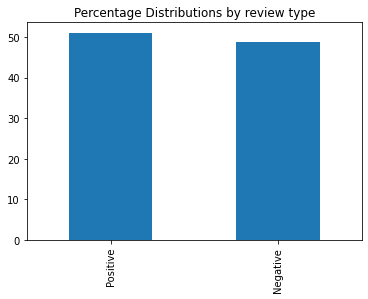

In [94]:
import matplotlib.pyplot as plt
%matplotlib inline
print('Percentage for default\n')
print(round(df1_all.sentiment.value_counts(normalize=True)*100,2))
round(df1_all.sentiment.value_counts(normalize=True)*100,2).plot(kind='bar')
plt.title('Percentage Distributions by review type')
plt.show()

Step 12: Removing columns

In [95]:
df1_all.drop(columns = ["reviews.date",'province','postalCode','name','longitude','latitude','country','city','categories','address',"reviews.dateAdded","reviews.doRecommend","reviews.id","reviews.rating","reviews.title","reviews.userCity","reviews.username","reviews.userProvince"], inplace = True)

In [96]:
df1_all.head(10)

,reviews.text,sentiment
0,Very conscientious and pleasant personnel and ...,Positive
1,"This is the second time I've stayed here, and ...",Positive
2,"Excellent stay. Room was big, staff was friend...",Positive
3,Staff went above and beyond to make sure we we...,Positive
4,We arrived on a Wednesday. Amber was VERY plea...,Positive
5,Sam Room 303 - the staff were responsive and f...,Negative
6,we chose this hotel for the location in the un...,Negative
7,It was close to the hospital that my brother w...,Positive
8,"Room was fine, but on a partial smoking floor ...",Negative
9,It was great! Could use another mirror of some...,Positive


In [97]:
df1_all.rename({"reviews.text":'Description'}, axis = 1, inplace = True)
df1_all

,Description,sentiment
0,Very conscientious and pleasant personnel and ...,Positive
1,"This is the second time I've stayed here, and ...",Positive
2,"Excellent stay. Room was big, staff was friend...",Positive
3,Staff went above and beyond to make sure we we...,Positive
4,We arrived on a Wednesday. Amber was VERY plea...,Positive
...,...,...
24808,Enjoyed our stay. Huge room and friendly staff...,Positive
24809,My fianc and I stayed here for our weekend vis...,Negative
24810,"Beautiful hotel, exceeded my expectations...wo...",Positive
24811,When we arrived we were greated by a friendly ...,Positive


Step 13: Checking for null values in any rows

In [98]:
df1_all.isnull().sum()

Description    14
sentiment       0
dtype: int64

In [99]:
df2_all = df1_all.dropna()

In [100]:
df2_all

,Description,sentiment
0,Very conscientious and pleasant personnel and ...,Positive
1,"This is the second time I've stayed here, and ...",Positive
2,"Excellent stay. Room was big, staff was friend...",Positive
3,Staff went above and beyond to make sure we we...,Positive
4,We arrived on a Wednesday. Amber was VERY plea...,Positive
...,...,...
24808,Enjoyed our stay. Huge room and friendly staff...,Positive
24809,My fianc and I stayed here for our weekend vis...,Negative
24810,"Beautiful hotel, exceeded my expectations...wo...",Positive
24811,When we arrived we were greated by a friendly ...,Positive


In [101]:
24813 -24799

14

In [102]:
df2_all.isnull().sum()

Description    0
sentiment      0
dtype: int64

Step 14: Applying first level cleaning

In [103]:
import re
import string

#This function converts to lower-case, removes square bracket, removes numbers and punctuation
def text_clean_1(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

cleaned1 = lambda x: text_clean_1(x)

Step 15: Now Let's take a look at the updated text.

In [104]:
df2_all['cleaned_description'] = pd.DataFrame(df2_all.Description.apply(cleaned1))
df2_all.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Description,sentiment,cleaned_description
0,Very conscientious and pleasant personnel and ...,Positive,very conscientious and pleasant personnel and ...
1,"This is the second time I've stayed here, and ...",Positive,this is the second time ive stayed here and bo...
2,"Excellent stay. Room was big, staff was friend...",Positive,excellent stay room was big staff was friendly...
3,Staff went above and beyond to make sure we we...,Positive,staff went above and beyond to make sure we we...
4,We arrived on a Wednesday. Amber was VERY plea...,Positive,we arrived on a wednesday amber was very pleas...
5,Sam Room 303 - the staff were responsive and f...,Negative,sam room the staff were responsive and frien...
6,we chose this hotel for the location in the un...,Negative,we chose this hotel for the location in the un...
7,It was close to the hospital that my brother w...,Positive,it was close to the hospital that my brother w...
8,"Room was fine, but on a partial smoking floor ...",Negative,room was fine but on a partial smoking floor a...
9,It was great! Could use another mirror of some...,Positive,it was great could use another mirror of some ...


Step 16: Now - Again we will apply a second round of cleaning

In [105]:
def text_clean_2(text):
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

cleaned2 = lambda x: text_clean_2(x)

Step 17: Now Let's take a look at the updated text

In [106]:
# Let's take a look at the updated text
df2_all['cleaned_description_new'] = pd.DataFrame(df2_all['cleaned_description'].apply(cleaned2))
df2_all.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Description,sentiment,cleaned_description,cleaned_description_new
0,Very conscientious and pleasant personnel and ...,Positive,very conscientious and pleasant personnel and ...,very conscientious and pleasant personnel and ...
1,"This is the second time I've stayed here, and ...",Positive,this is the second time ive stayed here and bo...,this is the second time ive stayed here and bo...
2,"Excellent stay. Room was big, staff was friend...",Positive,excellent stay room was big staff was friendly...,excellent stay room was big staff was friendly...
3,Staff went above and beyond to make sure we we...,Positive,staff went above and beyond to make sure we we...,staff went above and beyond to make sure we we...
4,We arrived on a Wednesday. Amber was VERY plea...,Positive,we arrived on a wednesday amber was very pleas...,we arrived on a wednesday amber was very pleas...
5,Sam Room 303 - the staff were responsive and f...,Negative,sam room the staff were responsive and frien...,sam room the staff were responsive and frien...
6,we chose this hotel for the location in the un...,Negative,we chose this hotel for the location in the un...,we chose this hotel for the location in the un...
7,It was close to the hospital that my brother w...,Positive,it was close to the hospital that my brother w...,it was close to the hospital that my brother w...
8,"Room was fine, but on a partial smoking floor ...",Negative,room was fine but on a partial smoking floor a...,room was fine but on a partial smoking floor a...
9,It was great! Could use another mirror of some...,Positive,it was great could use another mirror of some ...,it was great could use another mirror of some ...


# Model training starts here:-

In [107]:
from sklearn.model_selection import train_test_split

Independent_var = df2_all.cleaned_description_new
Dependent_var = df2_all.sentiment

IV_train, IV_test, DV_train, DV_test = train_test_split(Independent_var, Dependent_var, test_size = 0.1, random_state = 225)

print('IV_train :', len(IV_train))
print('IV_test  :', len(IV_test))
print('DV_train :', len(DV_train))
print('DV_test  :', len(DV_test))

IV_train : 22319
IV_test  : 2480
DV_train : 22319
DV_test  : 2480


Step 18: Using pipeline

Note: The purpose of the pipeline is to assemble several steps that can be cross-validated together while setting different parameters.

In [108]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

tvec = TfidfVectorizer()
clf2 = LogisticRegression(solver = "lbfgs")


from sklearn.pipeline import Pipeline

In [109]:
model = Pipeline([('vectorizer',tvec),('classifier',clf2)])

model.fit(IV_train, DV_train)


from sklearn.metrics import confusion_matrix

predictions = model.predict(IV_test)

confusion_matrix(predictions, DV_test)

array([[1040,  158],
       [ 169, 1113]])

Step 19: In the final step we will see the model prediciton

In [110]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Accuracy : ", accuracy_score(predictions, DV_test))
print("Precision : ", precision_score(predictions, DV_test, average = 'weighted'))
print("Recall : ", recall_score(predictions, DV_test, average = 'weighted'))

Accuracy :  0.8681451612903226
Precision :  0.8682137932201381
Recall :  0.8681451612903226


*Step 20: *Trying the model on new reviews.

In [111]:
example = ["I'm not happy"]
result = model.predict(example)

print(result)

['Negative']
